# **RESULT ANALYSIS NOTEBOOK**
### Martí Cortada Garcia
---

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt

def return_number_from_string(input_string):
    numbers = "".join([char for char in input_string if char.isdigit()])
    return numbers

def Fnorm(A, B):
    number_of_matrices = len(A)
    Fnorm = 0
    for a, b in zip(A.items(),B.items()):
        Fnorm += np.linalg.norm((a[1]-b[1]), 'fro')
    return Fnorm/number_of_matrices

def get_abs_difference_of_a_given_matrix_position(A, B, i, j):
    number_of_matrices = len(A)
    abs_diff = 0
    for a, b in zip(A.items(),B.items()):
        abs_diff += abs(a[1][i][j] - b[1][i][j])
    return abs_diff/number_of_matrices


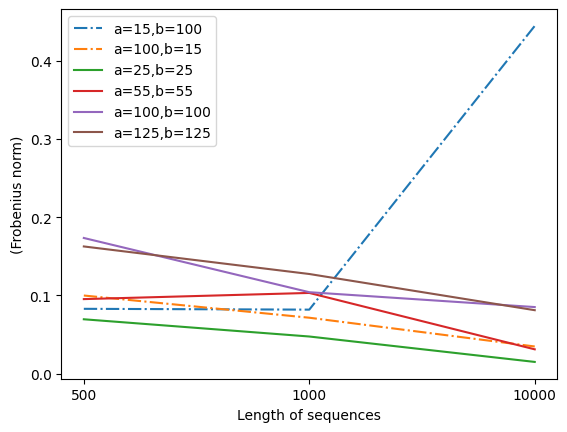

In [14]:
# Load the data
directory = "./OUTPUTS/" 

# Parameters to be compared, which will have 3 positions, concerning its length: [(l=500), (l=1000), (l=10000)]
a15_b100 = np.zeros(3)
a100_b15 = np.zeros(3)
a25_b25 = np.zeros(3)
a55_b55 = np.zeros(3)
a100_b100 = np.zeros(3)
a125_b125 = np.zeros(3)

# The last number indicates the idx_i and idx_j of the matrix (i.e. 11 means i=1, j=1)
a15_b100_11 = np.zeros(3)
a100_b15_11 = np.zeros(3)
a25_b25_11 = np.zeros(3)
a55_b55_11 = np.zeros(3)
a100_b100_11 = np.zeros(3)
a125_b125_11 = np.zeros(3)

# Branch lengths
bl_a15_b100 = np.zeros(3)
bl_a100_b15 = np.zeros(3)
bl_a25_b25 = np.zeros(3)
bl_a55_b55 = np.zeros(3)
bl_a100_b100 = np.zeros(3)
bl_a125_b125 = np.zeros(3)

# Iterate over all files in the directory that are related with RANDOM EM initialisation
for filename in os.listdir(directory):
    if filename.endswith("random") and filename != ".DS_Store":
        bl_a = return_number_from_string(filename.split("_")[1])
        bl_b = return_number_from_string(filename.split("_")[2])
        length = filename.split("_")[3]
        real_root_distr = np.load(directory + filename + "/real_root_distr.npy", allow_pickle=True)
        real_matrices = np.load(directory + filename + "/real_matrices.npy", allow_pickle=True).item()
        for dir_name in os.listdir(directory+filename+"/RESULTS/"):
            res_dir = directory+filename+"/RESULTS/"+dir_name+"/"
            M_estimation = np.load(res_dir+"M_estimation.npy", allow_pickle=True).item()
            estimated_branch_lengths = np.load(res_dir+"estimated_branch_lengths.npy", allow_pickle=True).item()
            root_estimation = np.load(res_dir+"root_estimation.npy", allow_pickle=True)
            Niter = open(res_dir+"Niter.txt", "r").read()
            TExec = open(res_dir+"TExec.txt", "r").read()
            if bl_a == "15" and bl_b == "100":
                if length == "500":
                    a15_b100[0] = Fnorm(M_estimation, real_matrices)
                    a15_b100_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "1000":
                    a15_b100[1] = Fnorm(M_estimation, real_matrices)
                    a15_b100_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "10000":
                    a15_b100[2] = Fnorm(M_estimation, real_matrices)
                    a15_b100_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
            elif bl_a == "100" and bl_b == "15":
                if length == "500":
                    a100_b15[0] = Fnorm(M_estimation, real_matrices)
                    a100_b15_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "1000":
                    a100_b15[1] = Fnorm(M_estimation, real_matrices)
                    a100_b15_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "10000":
                    a100_b15[2] = Fnorm(M_estimation, real_matrices)
                    a100_b15_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
            elif bl_a == "25" and bl_b == "25":
                if length == "500":
                    a25_b25[0] = Fnorm(M_estimation, real_matrices)
                    a25_b25_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "1000":
                    a25_b25[1] = Fnorm(M_estimation, real_matrices)
                    a25_b25_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "10000":
                    a25_b25[2] = Fnorm(M_estimation, real_matrices)
                    a25_b25_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
            elif bl_a == "55" and bl_b == "55":
                if length == "500":
                    a55_b55[0] = Fnorm(M_estimation, real_matrices)
                    a55_b55_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "1000":
                    a55_b55[1] = Fnorm(M_estimation, real_matrices)
                    a55_b55_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "10000":
                    a55_b55[2] = Fnorm(M_estimation, real_matrices)
                    a55_b55_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
            elif bl_a == "100" and bl_b == "100":
                if length == "500":
                    a100_b100[0] = Fnorm(M_estimation, real_matrices)
                    a100_b100_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "1000":
                    a100_b100[1] = Fnorm(M_estimation, real_matrices)
                    a100_b100_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "10000":
                    a100_b100[2] = Fnorm(M_estimation, real_matrices)
                    a100_b100_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
            elif bl_a == "125" and bl_b == "125":
                if length == "500":
                    a125_b125[0] = Fnorm(M_estimation, real_matrices)
                    a125_b125_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "1000":
                    a125_b125[1] = Fnorm(M_estimation, real_matrices)
                    a125_b125_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                elif length == "10000":
                    a125_b125[2] = Fnorm(M_estimation, real_matrices)
                    a125_b125_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)

x = [500, 1000, 10000]
xi = list(range(len(x)))

plt.plot(xi, a15_b100, label = "a=15,b=100", linestyle="-.")
plt.plot(xi, a100_b15, label = "a=100,b=15", linestyle="-.")
plt.plot(xi, a25_b25, label = "a=25,b=25", linestyle="-")
plt.plot(xi, a55_b55, label = "a=55,b=55", linestyle="-")
plt.plot(xi, a100_b100, label = "a=100,b=100", linestyle="-")
plt.plot(xi, a125_b125, label = "a=125,b=125", linestyle="-")
plt.legend()
plt.xticks(xi, x)
plt.xlabel("Length of sequences")
plt.ylabel("(Frobenius norm)") 
plt.show()

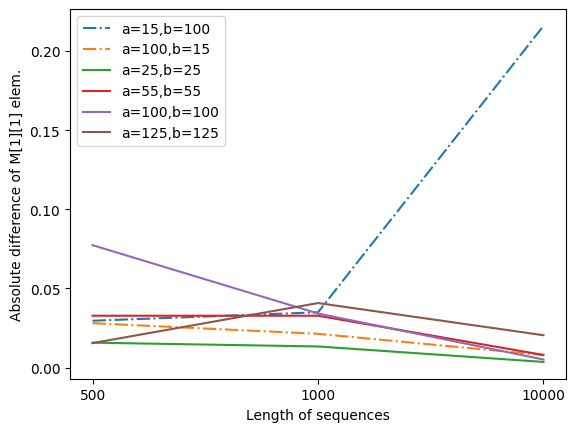

In [12]:
plt.plot(xi, a15_b100_11, label = "a=15,b=100", linestyle="-.")
plt.plot(xi, a100_b15_11, label = "a=100,b=15", linestyle="-.")
plt.plot(xi, a25_b25_11, label = "a=25,b=25", linestyle="-")
plt.plot(xi, a55_b55_11, label = "a=55,b=55", linestyle="-")
plt.plot(xi, a100_b100_11, label = "a=100,b=100", linestyle="-")
plt.plot(xi, a125_b125_11, label = "a=125,b=125", linestyle="-")
plt.legend()
plt.xticks(xi, x)
plt.xlabel("Length of sequences")
plt.ylabel("Absolute difference of M[1][1] elem.") 
plt.show()